# Experimentacion 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import math



In [2]:
def porcentajeDeProtocolos(path, x_axis, y_axis):
    df = pd.read_csv(path)
    df.drop(index = [0, 1] , inplace=True)
    sns.set(style="whitegrid")
    chart = sns.barplot(x=x_axis,y=y_axis, data=df, palette='Spectral', fmt='d')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

def DistribucionPorTipoFuente(path):
    
    # Leo los datos.
    df = pd.read_csv(path)

    # Integro los broadcast de distintos protocolos a 'BROADCAST' para que solo haya 1 columna.
    dfb=df.filter(like='BROADCAST')
    dfb=dfb.sum(axis = 1, skipna = True)
    
    # Integro los unicast de distintos protocolos a 'UNICAST' para que solo haya 1 columna.
    dfu=df.filter(like='UNICAST')
    dfu=dfu.sum(axis = 1, skipna = True)
    
    # Aplico los cambios
    dft=df.iloc[:, 0]
    df=pd.concat([dft, dfb, dfu], axis=1)
    df.columns =['Time', 'BROADCAST', 'UNICAST']
    df = df.tail(1)
    df = df.stack().reset_index(-1).iloc[:, ::-1]
    
    # Les cambio los nombres a las columnas
    df.columns = ['cantidad de apariciones', 'simbolo']
    df = df.rename(columns={0: "cantidad de apariciones", "simbolos": "simbolo"})
    df = df.iloc[1:]
    print(df)
    #Plot
    sns.set(style="whitegrid")
    chart = sns.barplot(x="simbolo",y="cantidad de apariciones", data=df, palette='Spectral')
    chart.set(yscale="linear")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    chart.figure.savefig('distribucionPorFuente.png',bbox_inches='tight')
    
def InformacionPorSimbolo(path):
    
 

    #Leo y me quedo con la ultima fila que son los valores finales.
    df = pd.read_csv(path)
    df = df.tail(1)
    df = df.stack().reset_index(-1).iloc[:, ::-1]
    # Les cambio los nombres a las columnas 
    df.columns = ['informacion', 'simbolo']
    df = df.rename(columns={0: "informacion", "simbolos": "simbolo"})
    df = df.iloc[1:]
    print(df)
    #Calculo la informacion de los eventos
    
    
    df['informacion'] = ((df['informacion'] / df['informacion'].sum()))
    df['informacion'] = df['informacion'].astype(np.float64)
    df['proba']=df['informacion']
    df['informacion'] = - np.log(df['informacion'])/ np.log(2) 
   
    #Plot
    sns.set(style="whitegrid")
    chart2 = sns.barplot(x="simbolo",y="informacion", data=df, palette='Spectral')
    chart2.set(yscale="linear")
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
    chart2.figure.savefig('informacionporsimbolo.png',bbox_inches='tight')
    
    df['entropia']=df['proba']*df['informacion']
    entropia=df['entropia'].sum()
    print(entropia)
    
    
    
    
    
    
    

    

In [3]:
def DistribucionPorMAC(path):
    
       #Leo y me quedo con la ultima fila que son los valores finales.
    df = pd.read_csv(path)
    df = df.tail(1)
    df = df.stack().reset_index(-1).iloc[:, ::-1]
    # Les cambio los nombres a las columnas 
    df.columns = ['cantidad apariciones', 'simbolo']
    df = df.rename(columns={0: "cantidad apariciones", "simbolos": "simbolo"})
    df = df.iloc[1:]
    print(df)
 
   
    #Plot
    sns.set(style="whitegrid")
    chart2 = sns.barplot(x="simbolo",y="cantidad apariciones", data=df, palette='Spectral')
    chart2.set(yscale="linear")
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
    chart2.figure.savefig('informacionporsimboloMAC.png',bbox_inches='tight')
    
        
    df['informacion'] = ((df['cantidad apariciones'] / df['cantidad apariciones'].sum()))
    df['informacion'] = df['informacion'].astype(np.float64)
    df['proba']=df['informacion']
    df['informacion'] = - np.log(df['informacion'])/ np.log(2) 
    
    df['entropia']=df['proba']*df['informacion']
    entropia=df['entropia'].sum()
    print(entropia)
    
    
   
    
    
    
    
    

   cantidad apariciones                                  simbolo
18                  3.0    src: 192.168.0.24 dst:  (192.168.0.2)
18                  3.0    src: 192.168.0.2 dst:  (192.168.0.24)
18                  3.0  src: 192.168.0.24 dst:  (192.168.0.113)
18                  3.0  src: 192.168.0.113 dst:  (192.168.0.24)
18                  3.0    src: 192.168.0.24 dst:  (192.168.0.7)
18                  3.0    src: 192.168.0.24 dst:  (192.168.0.3)
18                  1.0    src: 192.168.0.24 dst:  (192.168.0.1)
2.7463840917077538


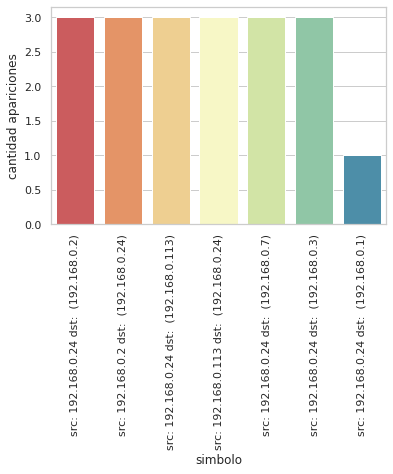

In [7]:
DistribucionPorMAC('../capturasS2.csv')

    informacion        simbolo
102         9.0  192.168.0.113
102        33.0    192.168.0.1
102        33.0  192.168.0.114
102         8.0   192.168.0.24
102         7.0    192.168.0.2
102         1.0    192.168.0.6
102         4.0   192.168.0.20
102         3.0        0.0.0.0
102         3.0   192.168.0.14
102         1.0    192.168.0.7
102         1.0    192.168.0.3
2.5833879412670155


'../capturas.csv'

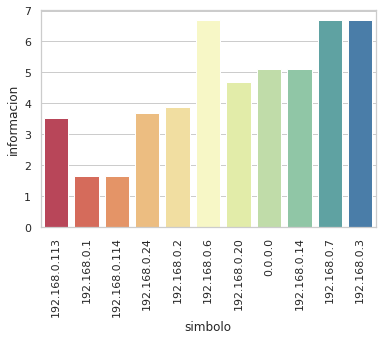

In [60]:
InformacionPorSimbolo('../capturasS2.csv')
('../capturas.csv')



In [17]:
print("HOLA" in ["HOLA asd", "aksldklsad"])

False


     cantidad de apariciones    simbolo
5647                    2773  BROADCAST
5647                    7227    UNICAST


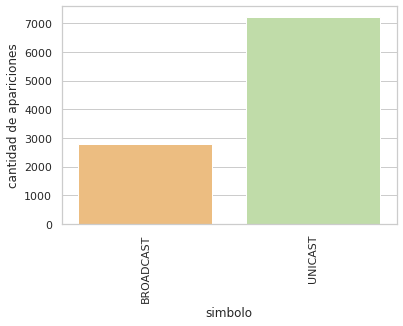

In [19]:
DistribucionPorTipoFuente('../capturas_S4.csv')